In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [ ]:
df_cluster_centroids = pd.read_csv('../Output/cluster_centorids.cvs')

In [2]:
df = pd.read_parquet('../Input/bookes_data_category_clustered.parquet')
print(df.shape)
df.head()

(40635, 14)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,x_axis,y_axis,cluster,cluster_name
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,-0.329316,0.457113,2,Religion
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,https://play.google.com/store/books/details?id...,Biography & Autobiography,1.0,-0.274471,-0.368388,6,Biography & Autobiography
33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,History,1.0,-0.365257,0.146197,1,History
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,2002-11,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Juvenile Fiction,2.0,0.236387,-0.555932,0,Juvenile Fiction
43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],http://books.google.com/books/content?id=xLe4n...,http://books.google.nl/books?id=xLe4nWzeSw0C&p...,Hippocrene Books,2005,http://books.google.nl/books?id=xLe4nWzeSw0C&d...,Foreign Language Study,1.0,-0.254290,0.020118,7,Performing Arts


In [5]:


# Function to plot books from two publishers
def plot_books(df, publisher1, publisher2):
    # Filter the dataframe for the two publishers
    df_pub1 = df[df['publisher'] == publisher1]
    df_pub2 = df[df['publisher'] == publisher2]
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    
    # Define different markers for each cluster
    markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p']
    
    # Plot books from the first publisher
    for cluster_name, group in df_pub1.groupby('cluster_name'):
        plt.scatter(group['x_axis'], group['y_axis'], 
                    label=f"{cluster_name} ({publisher1})", 
                    marker=markers[group['cluster'].iloc[0] % len(markers)], 
                    color='red', edgecolor='black')
    
    # Plot books from the second publisher
    for cluster_name, group in df_pub2.groupby('cluster_name'):
        plt.scatter(group['x_axis'], group['y_axis'], 
                    label=f"{cluster_name} ({publisher2})", 
                    marker=markers[group['cluster'].iloc[0] % len(markers)], 
                    color='blue', edgecolor='black')
    
    # Adding labels and title
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Books Plot by Publisher and Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()



In [31]:
# Function to plot density for two publishers side by side with category annotations
def plot_density_side_by_side_with_annotations(df_books, df_centroids, publisher1, publisher2):
    # Filter the dataframe for the two publishers
    df_pub1 = df_books[df_books['publisher'] == publisher1]
    df_pub2 = df_books[df_books['publisher'] == publisher2]
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    
    # Plot density for the first publisher on the first subplot
    sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.5)
    axes[0].set_title(f'Density Plot for {publisher1}')
    axes[0].set_xlabel('X Axis')
    axes[0].set_ylabel('Y Axis')
    

    
    # Plot density for the second publisher on the second subplot
    sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.5)
    axes[1].set_title(f'Density Plot for {publisher2}')
    axes[1].set_xlabel('X Axis')
    
    
    # Annotate cluster centroids on both subplots
    for i in range(len(df_centroids)):
        axes[0].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['category'],
                     fontsize=10, ha='center', color='black', weight='bold')
        axes[1].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['category'],
                     fontsize=10, ha='center', color='black', weight='bold')
    
    plt.show()



In [33]:
df['publisher'].value_counts().head(20)

publisher
Simon and Schuster            2111
Penguin                       1989
Harper Collins                1418
Macmillan                      784
Vintage                        724
Houghton Mifflin Harcourt      585
Open Road Media                571
Random House                   542
John Wiley & Sons              506
Cambridge University Press     432
Bantam                         387
Courier Corporation            369
HarperCollins                  368
Hachette UK                    351
W. W. Norton & Company         345
Ballantine Books               294
Penguin UK                     281
Zondervan                      271
Oxford University Press        234
Routledge                      229
Name: count, dtype: int64

/tmp/ipykernel_79154/330065460.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.5)
/tmp/ipykernel_79154/330065460.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.5)


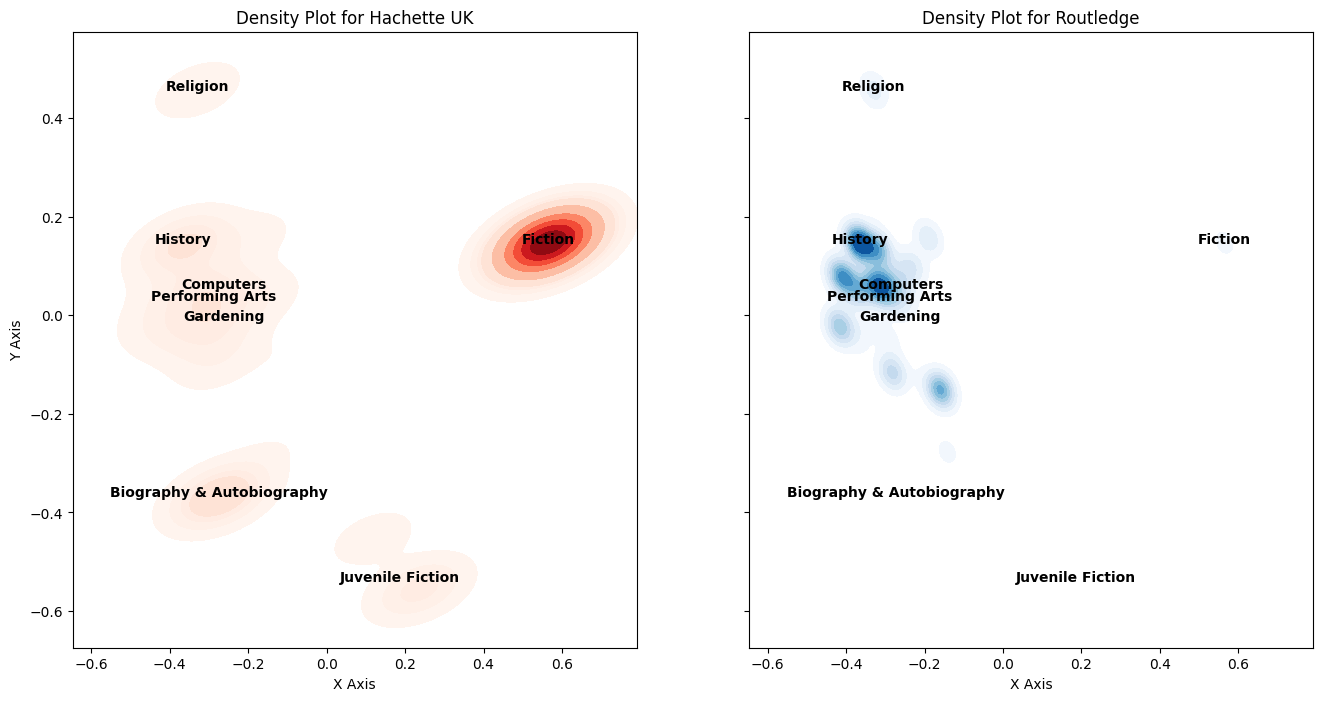

In [34]:
# Call the function with two publishers
plot_density_side_by_side_with_annotations(df, df_cluster_centroids, "Hachette UK", "Routledge")